### CASA0002_Urban simulation
# London underground network analysis

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

# Part 1: London’s Underground Resilience

# I. Topological Network

## 1. Constructing the networks

In [2]:
#load the graphml file for London's underground

G = nx.read_graphml('london.graph.xml')

In [3]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [4]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [5]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [6]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [7]:
station_name = list(G.nodes)

In [8]:
for node in station_name:
    G.nodes[node]['station_name'] = node

In [9]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [10]:
# To check edges attributes:
list(G.edges(data = True))[61]

('Swiss Cottage',
 'Finchley Road',
 {'length': 645.3527442249119,
  'line_name': 'Jubilee',
  'flows': 2736,
  'station_1_': 'Swiss Cottage',
  'station_2_': 'Finchley Road'})

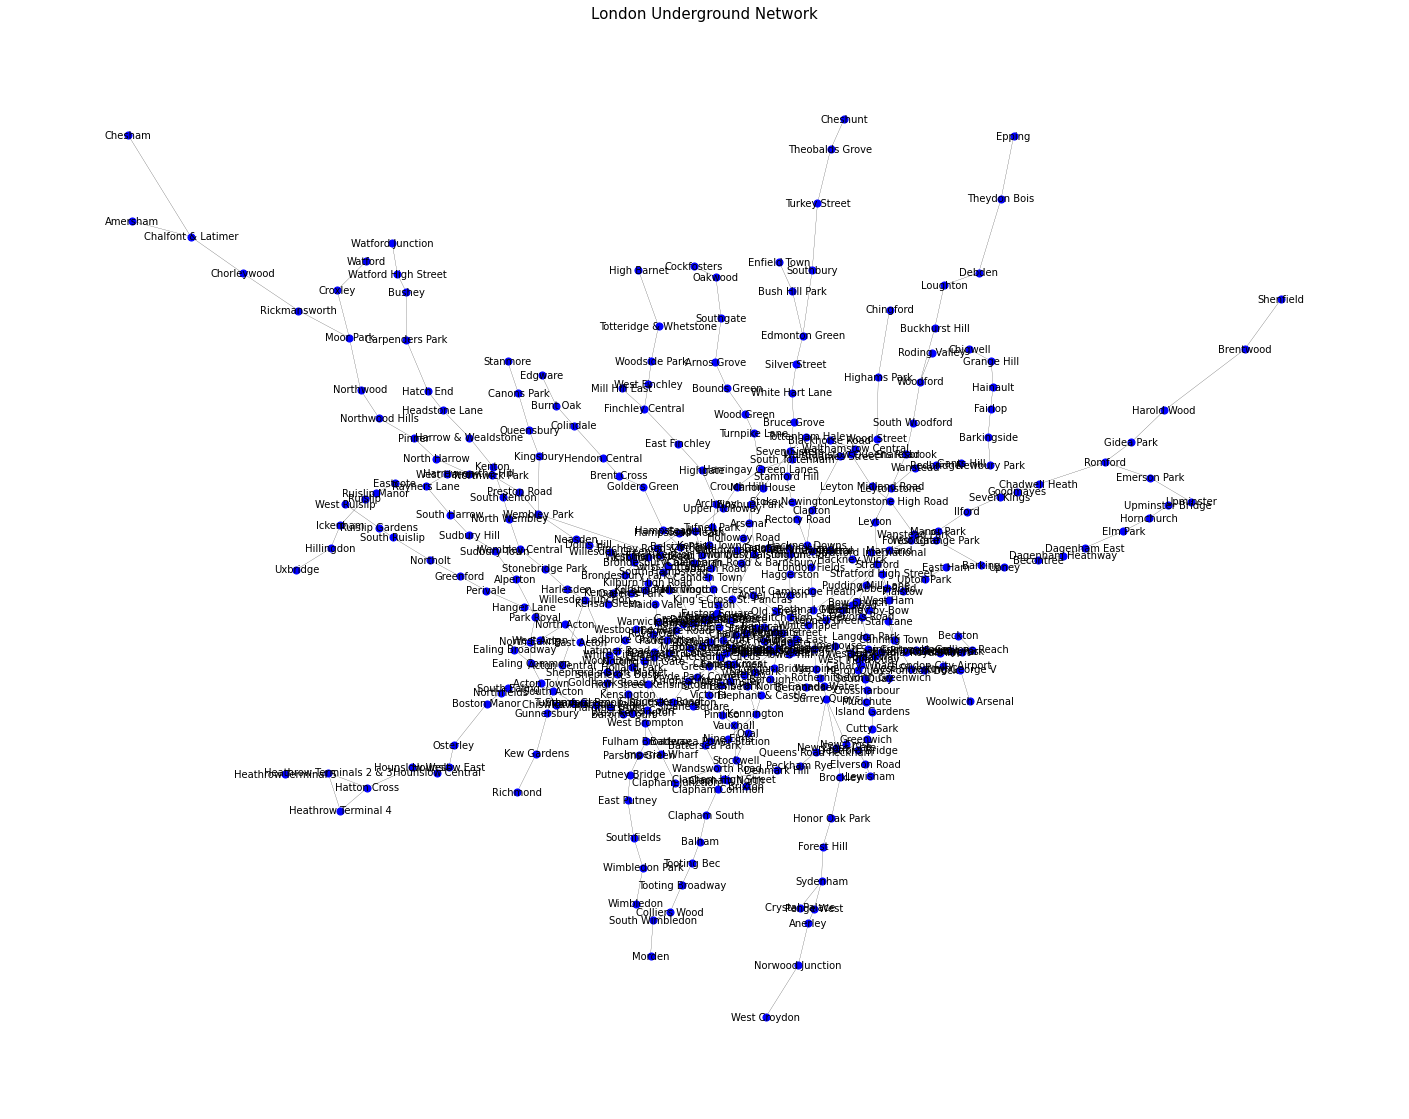

In [11]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London Underground Network",fontsize=15)
plt.axis("off")
plt.show()

In [12]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,flows,station_2_,length,station_1_,line_name
0,Wembley Park,Kingsbury,12356,Kingsbury,2916.771558,Wembley Park,Jubilee
1,Wembley Park,Neasden,6744,Neasden,2353.165938,Wembley Park,Jubilee
2,Wembley Park,Preston Road,36601,Preston Road,1419.735166,Wembley Park,Metropolitan
3,Wembley Park,Finchley Road,55216,Finchley Road,7266.373927,Wembley Park,Metropolitan
4,Kingsbury,Queensbury,9419,Queensbury,1245.995234,Kingsbury,Jubilee
5,Queensbury,Canons Park,6385,Canons Park,1693.307343,Queensbury,Jubilee
6,Canons Park,Stanmore,3624,Stanmore,1419.669476,Canons Park,Jubilee
7,Stratford,West Ham,91801,West Ham,1673.509515,Stratford,Jubilee
8,Stratford,Mile End,12010,Mile End,2805.001392,Stratford,Central
9,Stratford,Leyton,56082,Leyton,2131.342926,Stratford,Central


## 2.  Centrality measures

#### Degree Centrality on nodes:

In [13]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [14]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


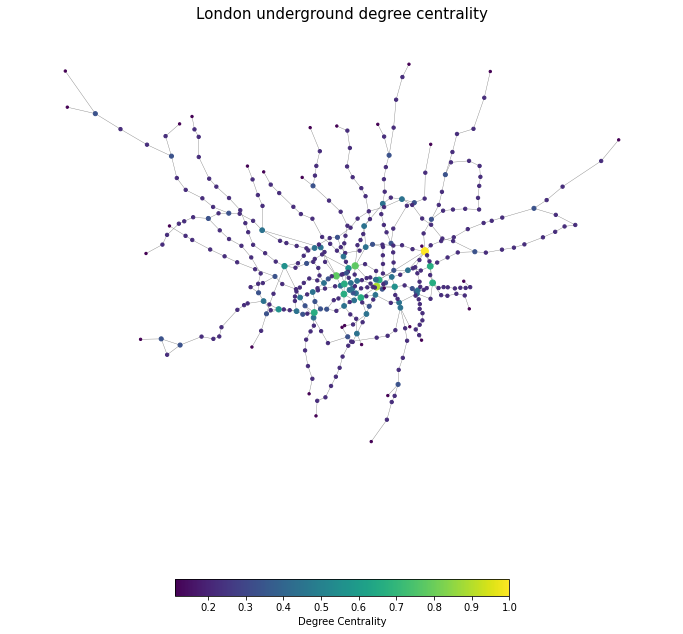

In [15]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:

In [16]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


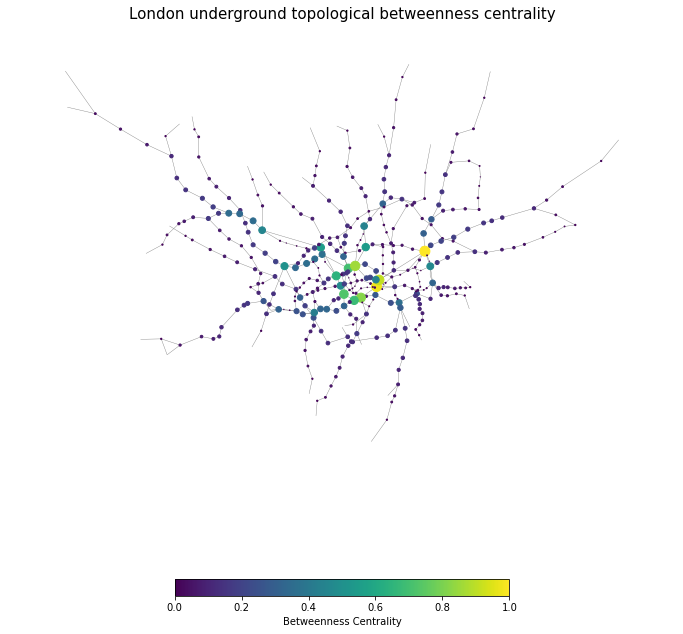

In [17]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

In [18]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


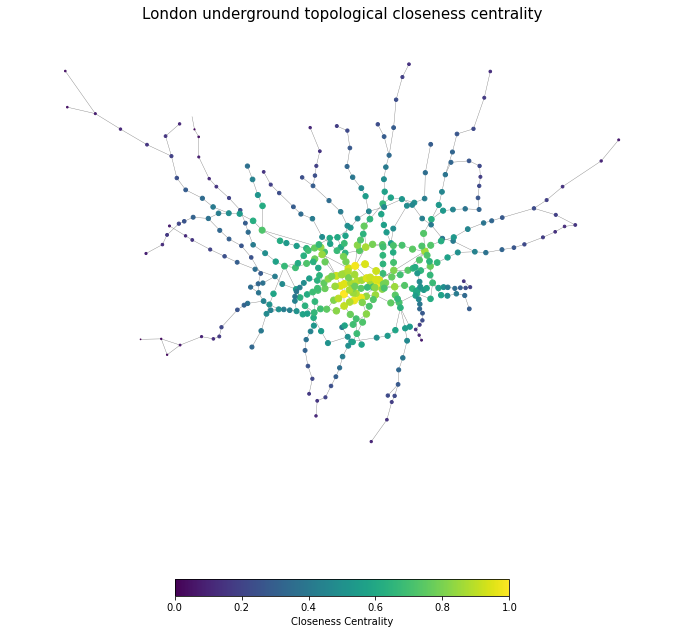

In [19]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological closeness centrality",fontsize=15)
plt.show()

## 3.Node Removal, 6 Scenarios

#### 3.1 Non-sequential removal from degree centrality
#### 3.2 Non-sequential removal from closeness centrality
#### 3.3 Non-sequential removal from betweenness centrality
#### 3.4 Sequential removal from degree centrality
#### 3.5 Sequential removal from closeness centrality
#### 3.6 Sequential removal from betweenness

In [20]:
# 3.1 non-sequential removal from degree centrality
degree_centrality_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
node1=list(degree_centrality_df.sort_values('degree',axis = 0,ascending = False).index)
max_1=node1[0:10]

degree_centrality_df.sort_values('degree',axis = 0,ascending = False)

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
...,...
High Barnet,0.0025
Battersea Park,0.0025
New Cross,0.0025
Crystal Palace,0.0025


In [21]:
# 3.4 sequential removal from degree centrality
max_4=[]
G_4=G.copy()
for i in range(0,10):
    deg_london=nx.degree_centrality(G_4)
    nx.set_node_attributes(G_4,dict(deg_london),'degree')
    degree_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
    node4=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    max_4.append(node4[0])
    G_4.remove_nodes_from([node4[0]])

In [22]:
# 3.2 non-sequential removal from closeness centrality
closeness_centrality_df=pd.DataFrame.from_dict(clos_t,columns=['closeness_t'],orient='index')
node2=list(closeness_centrality_df.sort_values('closeness_t',axis = 0,ascending = False).index)
max_2=node2[0:10]

closeness_centrality_df.sort_values('closeness_t',axis = 0,ascending = False)

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
...,...
Heathrow Terminals 2 & 3,0.045096
Heathrow Terminal 4,0.045091
Watford High Street,0.044302
Heathrow Terminal 5,0.043155


In [23]:
# 3.5 sequential removal from closeness centrality
max_5=[]
G_5=G.copy()
for i in range(0,10):
    clos_t=nx.closeness_centrality(G_5)
    nx.set_node_attributes(G_5,clos_t,'closeness_t')
    closeness_df=pd.DataFrame.from_dict(clos_t,columns=['closeness_t'],orient='index')
    node5=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
    max_5.append(node5[0])
    G_5.remove_nodes_from([node5[0]])

In [24]:
# 3.3 non-sequential removal from betweenness centrality
betweenness_centrality_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
node3=list(betweenness_centrality_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
max_3=node3[0:10]

betweenness_centrality_df.sort_values('betweenness_t',axis = 0,ascending = False)

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
...,...
Edgware,0.000000
Woolwich Arsenal,0.000000
Stratford International,0.000000
Watford Junction,0.000000


In [25]:
# 3.6 sequential removal from betweenness centrality
max_6=[]
G_6=G.copy()

for i in range(0,10):
    # recalculate the centrality values each time and remove the most largest one
    bet_london_t=nx.betweenness_centrality(G_6, normalized=False)
    nx.set_node_attributes(G_6,bet_london_t,'betweenness_t')
    betweenness_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
    node6=list(betweenness_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
    max_6.append(node6[0])
    G_6.remove_nodes_from([node6[0]])

### 10th most important nodes

In [26]:
#top ten important stations of London underground syste
top_10=pd.DataFrame(index=range(0,10),columns=['Degree_Non-seq','Closeness_Non-seq','Betweenness_Non-seq','Degree_Seq','Closeness_Seq_','Betweenness_Seq'])

In [27]:
columns=['Degree_Non-seq','Closeness_Non-seq','Betweenness_Non-seq','Degree_Seq','Closeness_Seq_','Betweenness_Seq']
max_all=[max_1,max_2,max_3,max_4,max_5,max_6]
for i in range(0,6):
    for j in range(0,10):
        top_10[columns[i]][j]=G.nodes[max_all[i][j]]['station_name']
top_10.insert(0,'Rank',range(1,11))  

#show in a table
top_10

,Rank,Degree_Non-seq,Closeness_Non-seq,Betweenness_Non-seq,Degree_Seq,Closeness_Seq_,Betweenness_Seq
0,1,Stratford,Green Park,Stratford,Stratford,Green Park,Stratford
1,2,Bank and Monument,Bank and Monument,Bank and Monument,Bank and Monument,King's Cross St. Pancras,King's Cross St. Pancras
2,3,King's Cross St. Pancras,King's Cross St. Pancras,Liverpool Street,Baker Street,Waterloo,Waterloo
3,4,Baker Street,Westminster,King's Cross St. Pancras,King's Cross St. Pancras,Bank and Monument,Bank and Monument
4,5,Earl's Court,Waterloo,Waterloo,Earl's Court,West Hampstead,Canada Water
5,6,Oxford Circus,Oxford Circus,Green Park,Green Park,Canada Water,West Hampstead
6,7,Liverpool Street,Bond Street,Euston,Canning Town,Stratford,Earl's Court
7,8,Waterloo,Farringdon,Westminster,Willesden Junction,Earl's Court,Shepherd's Bush
8,9,Green Park,Angel,Baker Street,Turnham Green,Shepherd's Bush,Euston
9,10,Canning Town,Moorgate,Finchley Road,Oxford Circus,Oxford Circus,Baker Street


## Impact Measures Assessment

### Impact measures
#### 1: The Size of Giant Component

In [28]:
def largest(Giant):
    # Get the list of components:
    components = nx.connected_components(Giant)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = Giant.subgraph(largest_component)
    size = Largest_subgraph.number_of_nodes()
    
    return size

In [29]:
#check
largest(G)

401

In [30]:
#3.1
deg_london =nx.degree_centrality(G)
degree_centrality_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
node1=list(degree_centrality_df.sort_values('degree',axis = 0,ascending = False).index)
Giant_component_1=[]
G_1=G.copy()
for i in range(0,len(list(G.nodes))):
    Giant_component_1.append(largest(G_1))
    G_1.remove_nodes_from([node1[i]])

In [31]:
#3.2
clos_t=nx.closeness_centrality(G)
closeness_centrality_df=pd.DataFrame.from_dict(clos_t,columns=['closeness_t'],orient='index')
node2=list(closeness_centrality_df.sort_values('closeness_t',axis = 0,ascending = False).index)
Giant_component_2=[]
G_2=G.copy()
for i in range(0,len(list(G.nodes))):
    Giant_component_2.append(largest(G_2))
    G_2.remove_nodes_from([node2[i]])

In [32]:
#3.3
bet_london_t=nx.betweenness_centrality(G, normalized=False)
betweenness_centrality_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
node3=list(betweenness_centrality_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
Giant_component_3=[]
G_3=G.copy()
for i in range(0,len(list(G.nodes))):
    Giant_component_3.append(largest(G_3))
    G_3.remove_nodes_from([node3[i]])

In [33]:
#3.4
Giant_component_4=[]
G_4=G.copy()
for i in range(0,len(list(G.nodes))):
    Giant_component_4.append(largest(G_4))
    deg_london=nx.degree_centrality(G_4)
    nx.set_node_attributes(G_4,dict(deg_london),'degree')
    degree_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
    node4=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    G_4.remove_nodes_from([node4[0]])

In [34]:
#3.5
Giant_component_5=[]
G_5=G.copy()
for i in range(0,len(list(G.nodes))):
    Giant_component_5.append(largest(G_5))
    clos_t=nx.closeness_centrality(G_5)
    nx.set_node_attributes(G_5,clos_t,'closeness_t')
    closeness_df=pd.DataFrame.from_dict(clos_t,columns=['closeness_t'],orient='index')
    node5=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
    G_5.remove_nodes_from([node5[0]])

In [35]:
#3.6
Giant_component_6=[]
G_6=G.copy()
for i in range(0,len(list(G.nodes))):
    Giant_component_6.append(largest(G_6))
    bet_london_t=nx.betweenness_centrality(G_6, normalized=False)
    nx.set_node_attributes(G_6,bet_london_t,'betweenness_t')
    betweenness_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
    node6=list(betweenness_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
    G_6.remove_nodes_from([node6[0]])

In [36]:
# normalize the giant component
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [37]:
Giant_component_1 = NormalizeData(Giant_component_1)
Giant_component_2 = NormalizeData(Giant_component_2)
Giant_component_3 = NormalizeData(Giant_component_3)
Giant_component_4 = NormalizeData(Giant_component_4)
Giant_component_5 = NormalizeData(Giant_component_5)
Giant_component_6 = NormalizeData(Giant_component_6)

## Plot the result from impact measure#1

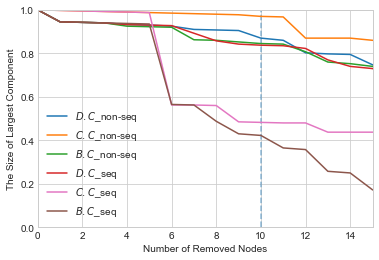

In [38]:
plt.style.use("seaborn-whitegrid")

plt.xlabel('Number of Removed Nodes')
plt.ylabel('The Size of Largest Component')
plt.xlim(xmax=15,xmin=0)
plt.ylim(ymax=1,ymin=0)
x = range(0,401)
plt.axvline(x=10,ls='--',alpha=0.5)

plt.plot(x, Giant_component_1,'-', color='tab:blue',label='${D.C}$_non-seq')
plt.plot(x, Giant_component_2,'-', color='tab:orange',label='${C.C}$_non-seq')
plt.plot(x, Giant_component_3,'-', color='tab:green', label='${B.C}$_non-seq')
plt.plot(x, Giant_component_4,'-', color='tab:red', label='${D.C}$_seq')
plt.plot(x, Giant_component_5,'-', color='tab:pink',label='${C.C}$_seq')
plt.plot(x, Giant_component_6,'-', color='tab:brown', label='${B.C}$_seq')

plt.legend(loc='best')

plt.legend()
plt.show()

### Impact measures
#### 2: The Average Clustering Coefficient

In [39]:
#3.1.1
deg_london =nx.degree_centrality(G)
degree_centrality_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
node1=list(degree_centrality_df.sort_values('degree',axis = 0,ascending = False).index)
Ave_cluster_1=[]
G_1=G.copy()
for i in range(0,len(list(G.nodes))):
    Ave_cluster_1.append(nx.average_clustering(G_1))
    G_1.remove_nodes_from([node1[i]])

In [40]:
#3.2.1
clos_t=nx.closeness_centrality(G)
closeness_centrality_df=pd.DataFrame.from_dict(clos_t,columns=['closeness_t'],orient='index')
node2=list(closeness_centrality_df.sort_values('closeness_t',axis = 0,ascending = False).index)
Ave_cluster_2=[]
G_2=G.copy()
for i in range(0,len(list(G.nodes))):
    Ave_cluster_2.append(nx.average_clustering(G_2))
    G_2.remove_nodes_from([node2[i]])

In [41]:
#3.3.1
bet_london_t=nx.betweenness_centrality(G, normalized=False)
betweenness_centrality_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
node3=list(betweenness_centrality_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
Ave_cluster_3=[]
G_3=G.copy()
for i in range(0,len(list(G.nodes))):
    Ave_cluster_3.append(nx.average_clustering(G_3))
    G_3.remove_nodes_from([node3[i]])

In [42]:
#3.4.1
Ave_cluster_4=[]
G_4=G.copy()
for i in range(0,len(list(G.nodes))):
    Ave_cluster_4.append(nx.average_clustering(G_4))
    deg_london=nx.degree_centrality(G_4)
    nx.set_node_attributes(G_4,dict(deg_london),'degree')
    degree_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
    node4=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    G_4.remove_nodes_from([node4[0]])

In [43]:
#3.5.1
Ave_cluster_5=[]
G_5=G.copy()
for i in range(0,len(list(G.nodes))):
    Ave_cluster_5.append(nx.average_clustering(G_5))
    clos_t=nx.closeness_centrality(G_5)
    nx.set_node_attributes(G_5,clos_t,'closeness_t')
    closeness_df=pd.DataFrame.from_dict(clos_t,columns=['closeness_t'],orient='index')
    node5=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
    G_5.remove_nodes_from([node5[0]])

In [44]:
#3.6.1
Ave_cluster_6=[]
G_6=G.copy()
for i in range(0,len(list(G.nodes))):
    Ave_cluster_6.append(nx.average_clustering(G_6))
    bet_london_t=nx.betweenness_centrality(G_6, normalized=False)
    nx.set_node_attributes(G_6,bet_london_t,'betweenness_t')
    betweenness_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
    node6=list(betweenness_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
    G_6.remove_nodes_from([node6[0]])

## Plot the result from impact measure#2

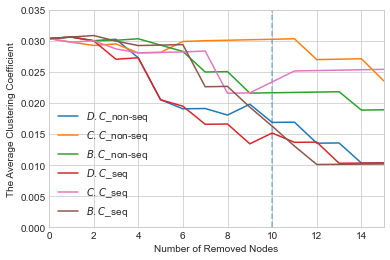

In [45]:
plt.style.use("seaborn-whitegrid")

plt.xlabel('Number of Removed Nodes')
plt.ylabel('The Average Clustering Coefficient')
plt.xlim(xmax=15,xmin=0)
plt.ylim(ymax=0.035,ymin=0)

x = range(0,401)
plt.axvline(x=10,ls='--',alpha=0.5)

plt.plot(x, Ave_cluster_1,'-', color='tab:blue',label='${D.C}$_non-seq')
plt.plot(x, Ave_cluster_2,'-', color='tab:orange',label='${C.C}$_non-seq')
plt.plot(x, Ave_cluster_3,'-', color='tab:green', label='${B.C}$_non-seq')

plt.plot(x, Ave_cluster_4,'-', color='tab:red', label='${D.C}$_seq')
plt.plot(x, Ave_cluster_5,'-', color='tab:pink',label='${C.C}$_seq')
plt.plot(x, Ave_cluster_6,'-', color='tab:brown', label='${B.C}$_seq')

plt.legend(loc='best')
plt.legend()
plt.show()

# II. Flows: Weighted Network

## 1. New Top 10 Important Nodes Based On Betweenness Centrality

#### From pervious analysis, the betweenness centrality reflects better the importance of a station for the functioning of the underground. Therefore, at this stage, I would recompute the ranking of the 10 most important nodes according to the betweenness centrality

In [46]:
#set flows as the weight
weight_1={}

for e1,e2,c in G.edges(data='flows'):
    if c==0:
        weight_1[(e1,e2)]=0
    else:
        weight_1[(e1,e2)]=1/c

nx.set_edge_attributes(G,weight_1,'weight_1')

nx.to_pandas_edgelist(G)

,source,target,flows,station_2_,length,weight_1,station_1_,line_name
0,Wembley Park,Kingsbury,12356,Kingsbury,2916.771558,0.000081,Wembley Park,Jubilee
1,Wembley Park,Neasden,6744,Neasden,2353.165938,0.000148,Wembley Park,Jubilee
2,Wembley Park,Preston Road,36601,Preston Road,1419.735166,0.000027,Wembley Park,Metropolitan
3,Wembley Park,Finchley Road,55216,Finchley Road,7266.373927,0.000018,Wembley Park,Metropolitan
4,Kingsbury,Queensbury,9419,Queensbury,1245.995234,0.000106,Kingsbury,Jubilee
...,...,...,...,...,...,...,...,...
462,Hounslow Central,Hounslow East,13469,Hounslow East,745.684383,0.000074,Hounslow Central,Piccadilly
463,Hounslow East,Osterley,15935,Osterley,967.494672,0.000063,Hounslow East,Piccadilly
464,Osterley,Boston Manor,17445,Boston Manor,2560.814291,0.000057,Osterley,Piccadilly
465,Boston Manor,Northfields,18598,Northfields,930.852145,0.000054,Boston Manor,Piccadilly


In [47]:
# Recompute the ranking of the 10 most important nodes according to betweenness centrality
bet_london_w=nx.betweenness_centrality(G,weight='weight_1',normalized=False)
# now add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Green Park,Green Park,44892.50
Bank and Monument,Bank and Monument,39758.50
Waterloo,Waterloo,31904.25
Westminster,Westminster,29664.50
Liverpool Street,Liverpool Street,26530.00
Stratford,Stratford,26125.00
Bond Street,Bond Street,22996.50
Euston,Euston,22314.00
Oxford Circus,Oxford Circus,21207.00
Warren Street,Warren Street,19916.00


## 2. Remove Top 1 Node and Use Two Impact Measure to Evaluate

### 2.1 Average Clustering Coefficient 

In [48]:
#copy it
G_new=G.copy()
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:
maxbet=[n for n in G_new.nodes() if G_new.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [49]:
Ave_cluster_3_1=[]
for i in range(0,2):
    Ave_cluster_3_1.append(nx.average_clustering(G_new))
    G_new.remove_nodes_from(maxbet)

In [50]:
#copy it
G_new1=G.copy()
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:
maxbet1=[n for n in G_new1.nodes() if G_new1.nodes[n]['betweenness_w'] == max(betweenness_w_values)]
maxbet1

['Green Park']

In [51]:
Ave_cluster_3_2=[]
for i in range(0,2):
    Ave_cluster_3_2.append(nx.average_clustering(G_new1,weight='weight_1'))
    G_new1.remove_nodes_from(maxbet1)

In [52]:
Ave_cluster_3_2[0]

0.0007039644327347355

In [53]:
Ave_cluster_3_1[1]

0.030625000000000003

In [54]:
# check the impact from removing top1 nodes before considering flow using average clustering coefficient
print(str((Ave_cluster_3_1[1]-Ave_cluster_3_1[0])/Ave_cluster_3_1[0]*100)+'%')

0.7985636114910979%


In [55]:
# check the impact from removing top1 nodes after considering flow using average clustering coefficient (adding weight)
print(str((Ave_cluster_3_2[1]-Ave_cluster_3_2[0])/Ave_cluster_3_2[0]*100)+'%')

0.8193060654047915%


### 2.2 Average Shortest Path Length

In [56]:
def shortpath(spl):
    '''
    This function is the second method to evaluate the impact on the network after nodes removal.
    It gets the value of relative size of the maximal connected sub-graph.
    '''
    # Get the list of components:
    components1 = nx.connected_components(spl)
    # Use the max() command to find the largest one:
    largest_component1 = max(components1, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph1 = spl.subgraph(largest_component1)
    size = nx.average_shortest_path_length(Largest_subgraph1)
    
    return size

In [57]:
def shortpath1(spl):
    '''
    This function is the second method to evaluate the impact on the network after nodes removal.
    It gets the value of relative size of the maximal connected sub-graph.
    '''
    # Get the list of components:
    components1 = nx.connected_components(spl)
    # Use the max() command to find the largest one:
    largest_component1 = max(components1, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph1 = spl.subgraph(largest_component1)
    size = nx.average_shortest_path_length(Largest_subgraph1,weight='weight_1')
    
    return size

In [58]:
#copy it
G_new2=G.copy()
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:
maxbet2=[n for n in G_new2.nodes() if G_new2.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet2

['Stratford']

In [59]:
Ave_short_path=[]
for i in range(0,2):
    Ave_short_path.append(shortpath(G_new2))
    G_new2.remove_nodes_from(maxbet2)

In [60]:
Ave_short_path

[13.545997506234414, 14.496447069006436]

In [61]:
#copy it again
G_new3=G.copy()
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:
maxbet3=[n for n in G_new3.nodes() if G_new3.nodes[n]['betweenness_w'] == max(betweenness_w_values)]
maxbet3

['Green Park']

In [62]:
Ave_short_path1=[]
for i in range(0,2):
    Ave_short_path1.append(shortpath1(G_new3))
    G_new3.remove_nodes_from(maxbet3)

In [63]:
Ave_short_path1

[0.0008114911860398989, 0.0008391467961624454]

In [64]:
# check the impact from removing top1 nodes before considering flow using average short path length
print(str((Ave_short_path[1]-Ave_short_path[0])/Ave_short_path[0]*100)+'%')

7.0164604883072395%


In [65]:
# check the impact from removing top1 nodes after considering flow using average short path length
print(str((Ave_short_path1[1]-Ave_short_path1[0])/Ave_short_path1[0]*100)+'%')

3.4079988295999453%


# Part 2: Spatial Interaction Models

### Read in OD data (“symbolic” population and the number of jobs for the stations)

In [66]:
#read in the London flows data
flows = pd.read_csv("london_flows.csv")

In [67]:
flows

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795550
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [68]:
#set the number to a very small number
flows['jobs']=flows.apply(lambda x:0.00000001 if x['jobs'] == 0 else x['jobs'], axis=1)
flows['population']=flows.apply(lambda x:0.00000001 if x['population'] == 0 else x['population'], axis=1)

In [69]:
#check
flows1=flows[flows.population== 0]  
flows1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       0 non-null      object 
 1   station_destination  0 non-null      object 
 2   flows                0 non-null      int64  
 3   population           0 non-null      float64
 4   jobs                 0 non-null      float64
 5   distance             0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 0.0+ bytes


In [70]:
# produce logarithms of them
x_variables = ["population", "jobs","distance"]
log_x_vars = []
for x in x_variables:
    flows[f"log_{x}"] = np.log(flows[x])
    log_x_vars.append(f"log_{x}")
flows.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274


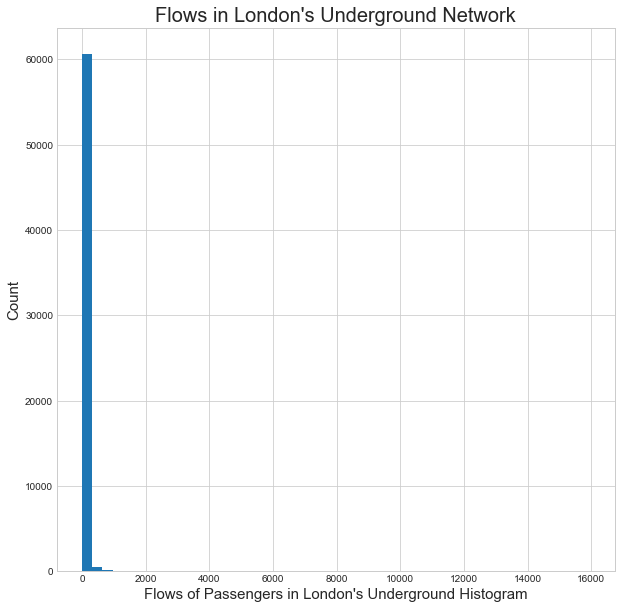

In [71]:
plt.subplots(figsize=(10,10))

plt.hist(flows["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("Flows of Passengers in London's Underground Histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Flows in London's Underground Network", fontsize = 20)
plt.grid(True)

## 2.1 Choose Model and Calibrate The Parameter Beta

### Testing the "Goodness-of-fit" for 4 Models

Goodness-of-fit is the correct term for checking how well your model estimates match up with your observed flows: the two most common are to look at the coefficient of determination ($r^2$) or the Square Root of Mean Squared Error (RMSE). import statsmodels.api as sm
import statsmodels.formula.api as smf $r^2$ is popular as it is quite intuitive and can be compared across models. RMSE is less intuitive, but some argue that it is better for comparing changes to the same model. Here we’ll do both…

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### R-Squared & RMSE


In [73]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

#### Testing Unconstrained Model (Inverse Power & Negative Exponential)

In [74]:
#create the formula
formula_u = 'flows ~ log_population + log_jobs + log_distance' 
#run the regression
uncosim = smf.glm(formula = formula_u, data=flows, family=sm.families.Poisson()).fit()

In [75]:
#inverse power
predictionsu =uncosim.get_prediction(flows[["log_population", "log_jobs", "log_distance"]])
predictions_summary_frameu = predictionsu.summary_frame()
flows["uncosimest"] = round(predictions_summary_frameu["mean"],0)

In [76]:
#Unconstrained Model using IP
betau = uncosim.params[-1]
R2u = CalcRSqaured(flows["flows"], flows["uncosimest"])
RMSEu = CalcRMSE(flows["flows"], flows["uncosimest"])
print(betau)
print(R2u)
print(RMSEu)

-0.6228020552852845
0.3212076758264683
108.296


In [77]:
#negative exponential
formula_u1 = 'flows ~ log_population + log_jobs + distance'  #dis
uncosim1 = smf.glm(formula = formula_u1, data=flows, family=sm.families.Poisson()).fit()

In [78]:
predictionsu1 =uncosim1.get_prediction(flows[["log_population", "log_jobs", "distance"]])
predictions_summary_frameu1 = predictionsu1.summary_frame()
flows["uncosimest1"] = round(predictions_summary_frameu1["mean"],0)

In [79]:
#Unconstrained Model using NE
betau1 = uncosim1.params[-1]
R2u1 = CalcRSqaured(flows["flows"], flows["uncosimest1"])
RMSEu1 = CalcRMSE(flows["flows"], flows["uncosimest1"])
print(betau1)
print(R2u1)
print(RMSEu1)

-9.036708790619138e-05
0.3622629580073664
105.686


#### Testing Production-Constrained Model (Inverse Power & Negative Exponential)

(the "-1" indicates no intercept in the regression model)

In [80]:
formula_p = 'flows ~ station_origin + log_jobs + log_distance -1' 
prodsim = smf.glm(formula = formula_p, data=flows, family=sm.families.Poisson()).fit()

In [81]:
#inverse power
predictionsp =prodsim.get_prediction(flows[["station_origin", "log_jobs","log_distance"]])
predictions_summary_framep = predictionsp.summary_frame()
flows["prodsimest"] = round(predictions_summary_framep["mean"],0)

/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [82]:
#Production-Constrained Model using IP
betap = prodsim.params[-1]
R2p = CalcRSqaured(flows["flows"], flows["prodsimest"])
RMSEp = CalcRMSE(flows["flows"], flows["prodsimest"])
print(betap)
print(R2p)
print(RMSEp)

-0.878119118369417
0.38829196662966575
102.857


In [83]:
formula_p1 = 'flows ~ station_origin + log_jobs + distance -1' 
prodsim1 = smf.glm(formula = formula_p1, data=flows, family=sm.families.Poisson()).fit()

In [84]:
#negative exponential
predictionsp1 =prodsim1.get_prediction(flows[["station_origin", "log_jobs","distance"]])
predictions_summary_framep1 = predictionsp1.summary_frame()
flows["prodsimest1"] = round(predictions_summary_framep1["mean"],0)

In [85]:
#Production-Constrained Model using NE
betap1 = prodsim1.params[-1]
R2p1 = CalcRSqaured(flows["flows"], flows["prodsimest1"])
RMSEp1 = CalcRMSE(flows["flows"], flows["prodsimest1"])
print(betap1)
print(R2p1)
print(RMSEp1)

-0.00015316619346461885
0.46807815299509453
96.229


#### Testing Attraction-Constrained Model (Inverse Power & Negative Exponential)

In [86]:
formula_a = 'flows ~ station_destination + log_population + log_distance -1' 
attrsim = smf.glm(formula = formula_a, data=flows, family=sm.families.Poisson()).fit()

In [87]:
#inverse power
predictionsa =attrsim.get_prediction(flows[["station_destination", "log_population", "log_distance"]])
predictions_summary_framea = predictionsa.summary_frame()
flows["attrsimest"] = round(predictions_summary_framea["mean"],0)

In [88]:
#Attraction-Constrained Model using IP
betaa = attrsim.params[-1]
R2a = CalcRSqaured(flows["flows"], flows["attrsimest"])
RMSEa = CalcRMSE(flows["flows"], flows["attrsimest"])
print(betaa)
print(R2a)
print(RMSEa)

-0.6351480703699903
0.3499489726623328
105.976


In [89]:
formula_a1 = 'flows ~ station_destination + log_population + distance -1' 
attrsim1 = smf.glm(formula = formula_a1, data=flows, family=sm.families.Poisson()).fit()

In [90]:
#negative exponential
predictionsa1 =attrsim1.get_prediction(flows[["station_destination", "log_population", "distance"]])
predictions_summary_framea1 = predictionsa1.summary_frame()
flows["attrsimest1"] = round(predictions_summary_framea1["mean"],0)

In [91]:
#Attraction-Constrained Model using NE
betaa1 = attrsim1.params[-1]
R2a1 = CalcRSqaured(flows["flows"], flows["attrsimest1"])
RMSEa1 = CalcRMSE(flows["flows"], flows["attrsimest1"])
print(betaa1)
print(R2a1)
print(RMSEa1)

-9.963285715356713e-05
0.3999692158515192
102.133


#### Testing Doubly Constrained Model (Inverse Power & Negative Exponential)

In [92]:
formula_d = 'flows ~ station_origin + station_destination + log_distance -1'
doubsim = smf.glm(formula = formula_d, data=flows, family=sm.families.Poisson()).fit()

In [93]:
#Doubly Constrained Model using IP
flows["doubsimest"] = np.round(doubsim.predict()) 
betad = doubsim.params[-1]
R2d = CalcRSqaured(flows["flows"], flows["doubsimest"])
RMSEd = CalcRMSE(flows["flows"], flows["doubsimest"])
print(betad)
print(R2d)
print(RMSEd)

-0.9096317604922738
0.4077003472410339
101.3


In [94]:
formula_d1 = 'flows ~ station_origin + station_destination + distance -1'
doubsim1 = smf.glm(formula = formula_d1, data=flows, family=sm.families.Poisson()).fit()

In [95]:
#Doubly Constrained Model using NE
flows["doubsimest1"] = np.round(doubsim1.predict()) 
betad1 = doubsim1.params[-1]
R2d1 = CalcRSqaured(flows["flows"], flows["doubsimest1"])
RMSEd1 = CalcRMSE(flows["flows"], flows["doubsimest1"])
print(betad1)
print(R2d1)
print(RMSEd1)

-0.00015436969215816595
0.4978554141117296
93.368


In [96]:
# I would use the production-constrained model, let's check it
print(prodsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 02 May 2022   Deviance:                   1.6477e+06
Time:                        19:14:53   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [97]:
# Extracting parameters
coefs = pd.DataFrame(prodsim1.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flows = flows.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flows.drop(columns = ["coef"], inplace = True)
#check this has worked
flows.head()

/var/folders/cb/rw9tz7zj639fh06t6jshwfqc0000gn/T/ipykernel_53509/505669945.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncosimest,uncosimest1,prodsimest,prodsimest1,attrsimest,attrsimest1,doubsimest,doubsimest1,alpha
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,62.0,55.0,78.0,53.0,71.0,55.0,77.0,-2.914322
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,-2.914322
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,3.0,3.0,4.0,4.0,5.0,3.0,4.0,-2.914322
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,66.0,66.0,99.0,70.0,93.0,77.0,112.0,-2.914322
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,32.0,49.0,56.0,33.0,36.0,45.0,48.0,-2.914322


In [98]:
alpha = prodsim1.params[0:-2]
gamma = prodsim1.params[-2]
beta = -prodsim1.params[-1]

In [99]:
alpha

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 399, dtype: float64

In [100]:
gamma

0.7552215895875043

In [101]:
beta

0.00015316619346461885

## 2.2 Test Scenarios

### 2.2.1 Scenario A

Scenario A: assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.

For testing scenario A, I would use the production-constrained model using the negative exponential function.
In this situation, the calibrated parameter beta is -0.000153166

In [102]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(flows.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flows = flows.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flows = flows.merge(D_j, on = "station_destination", how = "left" )

In [103]:
#testing scenario A
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val =row["jobs"]*0.5
    else:
        val = row["jobs"]
    return val
        
flows["jobs_1"] = flows.apply(new_sal, axis =1)
flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncosimest,...,prodsimest,prodsimest1,attrsimest,attrsimest1,doubsimest,doubsimest1,alpha,O_i,D_j,jobs_1
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,...,55.0,78.0,53.0,71.0,55.0,77.0,-2.914322,599,78549,78549.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,...,1.0,1.0,3.0,3.0,2.0,3.0,-2.914322,599,442,442.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,...,3.0,4.0,4.0,5.0,3.0,4.0,-2.914322,599,665,665.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,...,66.0,99.0,70.0,93.0,77.0,112.0,-2.914322,599,58772,29386.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,...,49.0,56.0,33.0,36.0,45.0,48.0,-2.914322,599,15428,15428.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,2.0,...,3.0,4.0,5.0,7.0,3.0,5.0,-2.914322,599,1208,1208.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,3.0,...,3.0,5.0,5.0,6.0,4.0,5.0,-2.914322,599,845,845.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,3.0,...,3.0,4.0,8.0,10.0,5.0,6.0,-2.914322,599,1748,1748.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,2.0,...,2.0,3.0,5.0,6.0,4.0,5.0,-2.914322,599,850,850.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,2.0,...,2.0,4.0,4.0,4.0,3.0,4.0,-2.914322,599,611,611.0


Now let's plug these new values into the model and see how this changes the flows in the system

In [104]:
flow_pt = pd.pivot_table(flows, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flow_pt

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [105]:
flows["prodsimest2"] = np.exp(flows["alpha"]+gamma*np.log(flows["jobs_1"]) 
                                 - beta*flows["distance"])

In [106]:
#first round the estimates
flows["prodsimest2"] = round(flows["prodsimest2"],0)
flows_a = flows.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows_a

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,555.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3730.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2854.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4765.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3083.0


In [107]:
#calculate some new alpha and beta values
Dj_gamma = flows["jobs_1"]**gamma
dist_beta = flows["distance"]**-beta
#calcualte the first stage of the Ai values
flows["Ai1"] = Dj_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(flows.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
flows = flows.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [108]:
#to check everything works, recreate the original estimates
flows["prodsimestsa1"] = flows['A_i']*flows["O_i"]*Dj_gamma*dist_beta
#round
flows["prodsimestsa1"] = round(flows["prodsimestsa1"])
#check
flows[["prodsimest1","prodsimest2", "prodsimestsa1"]]

,prodsimest1,prodsimest2,prodsimestsa1
0,78.0,78.0,148.0
1,1.0,1.0,3.0
2,4.0,4.0,4.0
3,99.0,59.0,70.0
4,56.0,56.0,43.0
...,...,...,...
61451,99.0,99.0,172.0
61452,295.0,295.0,250.0
61453,36.0,36.0,35.0
61454,125.0,125.0,64.0


In [109]:
flows_a1 = flows.pivot_table(values ="prodsimestsa1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows_a1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,24.0,24.0,NaN,4.0,2.0,NaN,25.0,...,21.0,3.0,9.0,7.0,NaN,4.0,NaN,4.0,NaN,3745.0
Aldgate,NaN,NaN,7.0,NaN,19.0,NaN,NaN,1.0,NaN,19.0,...,16.0,NaN,7.0,5.0,NaN,3.0,NaN,3.0,NaN,2891.0
Aldgate East,NaN,NaN,8.0,20.0,NaN,NaN,3.0,2.0,NaN,20.0,...,17.0,3.0,7.0,6.0,NaN,3.0,NaN,3.0,NaN,3179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,12.0,32.0,32.0,NaN,NaN,NaN,NaN,33.0,...,27.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,4870.0
Woodgrange Park,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,8.0,21.0,21.0,NaN,4.0,NaN,NaN,22.0,...,18.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3090.0


#### Visualize the flow change in Scenario A

In [110]:
#count the change
diff_1 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimestsa1':'sum'})
diff_1["differences_1"]= diff_1["prodsimestsa1"] - diff_1["flows"]
#diff_1["ori_per"]= diff_1["flows"] / 1542283.0
#diff_1["A_per"]= diff_1["prodsimestsa1"] / 1542283.0
#diff_1["Ori_A_per"]= diff_1["A_per"]-diff_1["ori_per"]
#diff_1["differences_per"]= diff_1["differences_1"]/diff_1["flows"]

#diff_1["per_abs"]= abs(diff_1["Ori_A_per"])
diff_1["diff_abs"]= abs(diff_1["differences_1"])
diff_1.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_1.head(11)

,station_destination,flows,prodsimestsa1,differences_1,diff_abs
55,Canary Wharf,58772,30481.0,-28291.0,28291.0
327,Stratford,55954,74119.0,18165.0,18165.0
15,Bank and Monument,78549,62870.0,-15679.0,15679.0
252,Oxford Circus,44368,31325.0,-13043.0,13043.0
356,Victoria,33251,24541.0,-8710.0,8710.0
198,King's Cross St. Pancras,33330,24717.0,-8613.0,8613.0
214,London Bridge,29926,22750.0,-7176.0,7176.0
139,Green Park,26754,21351.0,-5403.0,5403.0
365,Waterloo,23408,18403.0,-5005.0,5005.0
120,Farringdon,25592,20614.0,-4978.0,4978.0


In [111]:
#count the change
diff1 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimestsa1':'sum'})
diff1["differences1"]= diff1["prodsimestsa1"] - diff1["flows"]

diff1["diff_abs"]= abs(diff1["differences1"])
diff1.sort_values(by=["differences1"],ascending= False, inplace = True)
diff1 = diff1.head(11)
diff1

,station_destination,flows,prodsimestsa1,differences1,diff_abs
327,Stratford,55954,74119.0,18165.0,18165.0
387,Whitechapel,17633,21640.0,4007.0,4007.0
168,Highbury & Islington,25385,28929.0,3544.0,3544.0
54,Canada Water,20443,23714.0,3271.0,3271.0
56,Canning Town,15428,18687.0,3259.0,3259.0
372,West Brompton,5859,9113.0,3254.0,3254.0
389,Willesden Junction,4165,7181.0,3016.0,3016.0
294,Shepherd's Bush,9890,12830.0,2940.0,2940.0
142,Gunnersbury,4775,7644.0,2869.0,2869.0
375,West Ham,5487,8288.0,2801.0,2801.0


In [112]:
#count the change
diff_d = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimestsa1':'sum'})
diff_d["differences_d"]= diff_d["prodsimestsa1"] - diff_d["flows"]

diff_d["diff_abs_d"]= abs(diff_d["differences_d"])
diff_d.sort_values(by=["differences_d"],ascending= True, inplace = True)
diff_d = diff_d.head(11)
diff_d

,station_destination,flows,prodsimestsa1,differences_d,diff_abs_d
55,Canary Wharf,58772,30481.0,-28291.0,28291.0
15,Bank and Monument,78549,62870.0,-15679.0,15679.0
252,Oxford Circus,44368,31325.0,-13043.0,13043.0
356,Victoria,33251,24541.0,-8710.0,8710.0
198,King's Cross St. Pancras,33330,24717.0,-8613.0,8613.0
214,London Bridge,29926,22750.0,-7176.0,7176.0
139,Green Park,26754,21351.0,-5403.0,5403.0
365,Waterloo,23408,18403.0,-5005.0,5005.0
120,Farringdon,25592,20614.0,-4978.0,4978.0
228,Moorgate,24574,19923.0,-4651.0,4651.0


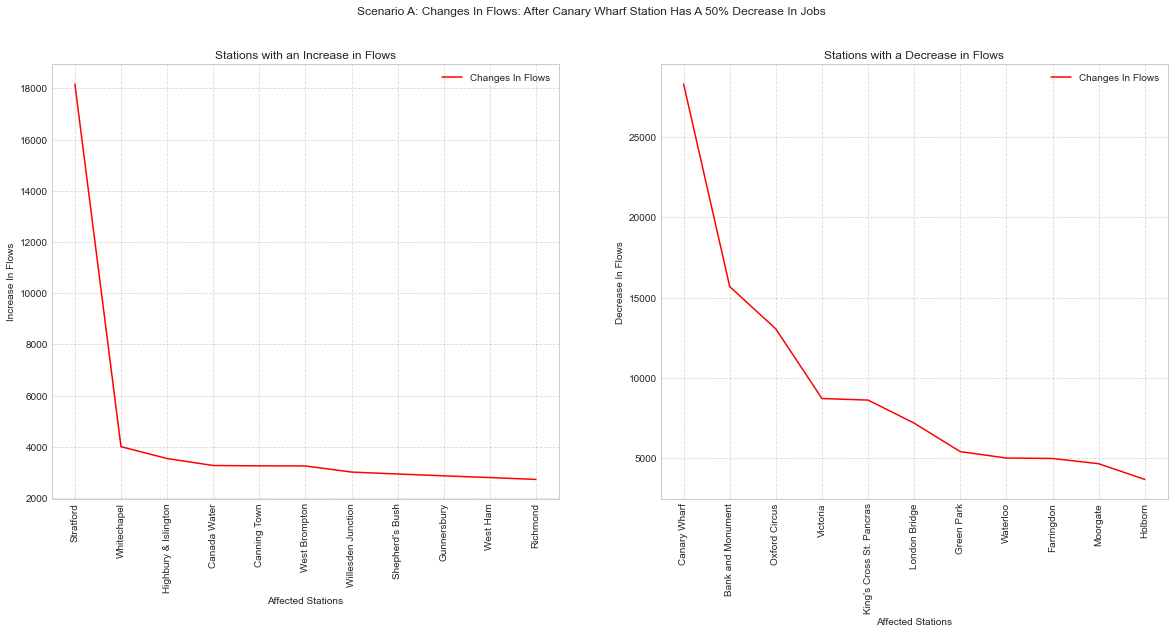

In [113]:
#plot for scenario A
fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].set_title('Stations with an Increase in Flows')
fig.suptitle("Scenario A: Changes In Flows: After Canary Wharf Station Has A 50% Decrease In Jobs")
ax[0].plot(list(diff1['diff_abs'][:11]), color = "red", label = 'Changes In Flows') 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Affected Stations") 
ax[0].set_ylabel("Increase In Flows")  
ax[0].set_xticks(list(range(11))) 
ax[0].set_xticklabels(list(diff1['station_destination'])[:11], rotation=90)
ax[0].legend(loc=1)




ax[1].set_title('Stations with a Decrease in Flows')
fig.suptitle("Scenario A: Changes In Flows: After Canary Wharf Station Has A 50% Decrease In Jobs") 
ax[1].plot(list(diff_d['diff_abs_d'][:11]), color = "red", label = 'Changes In Flows') 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Affected Stations") 
ax[1].set_ylabel("Decrease In Flows")  
ax[1].set_xticks(list(range(11))) 
ax[1].set_xticklabels(list(diff_d['station_destination'])[:11], rotation=90)
ax[1].legend(loc=1)
plt.show()
#plt.savefig("ScenarioA.png", dpi=600)

## 2.2.1 Scenario B

There is a significant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

In [114]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61456 entries, 0 to 61455
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61456 non-null  object 
 1   station_destination  61456 non-null  object 
 2   flows                61456 non-null  int64  
 3   population           61456 non-null  float64
 4   jobs                 61456 non-null  float64
 5   distance             61456 non-null  float64
 6   log_population       61456 non-null  float64
 7   log_jobs             61456 non-null  float64
 8   log_distance         61456 non-null  float64
 9   uncosimest           61456 non-null  float64
 10  uncosimest1          61456 non-null  float64
 11  prodsimest           61456 non-null  float64
 12  prodsimest1          61456 non-null  float64
 13  attrsimest           61456 non-null  float64
 14  attrsimest1          61456 non-null  float64
 15  doubsimest           61456 non-null 

## Select 2 values for beta
### $\beta$1 = 1

In [115]:
#set the new beta1 = 1
beta1 = 1

In [116]:
#check
beta1

1

In [117]:
flows.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncosimest,...,doubsimest,doubsimest1,alpha,O_i,D_j,jobs_1,prodsimest2,Ai1,A_i,prodsimestsa1
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,...,55.0,77.0,-2.914322,599,78549,78549.0,78.0,4969.549315,0.00005,148.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,...,2.0,3.0,-2.914322,599,442,442.0,1.0,99.375214,0.00005,3.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,...,3.0,4.0,-2.914322,599,665,665.0,4.0,135.303172,0.00005,4.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,...,77.0,112.0,-2.914322,599,58772,29386.0,59.0,2365.203174,0.00005,70.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,...,45.0,48.0,-2.914322,599,15428,15428.0,56.0,1454.082480,0.00005,43.0


In [118]:
flows["prodsimest_b1"] = np.exp(flows["alpha"]+gamma*flows["log_jobs"] 
                                 - beta1*flows["distance"])

In [119]:
flows["prodsimest_b1"] = round(flows["prodsimest_b1"],0)
flows2 = flows.pivot_table(values ="prodsimest_b1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
Aldgate East,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [120]:
#calculate some new alpha and beta values
Dj_gamma1 = flows["jobs"]**gamma
dist_beta1 = flows["distance"]**-beta1
#calcualte the first stage of the Ai values
flows["Ai1_1"] = Dj_gamma1 * dist_beta1
#now do the sum over all js bit
A_i1 = pd.DataFrame(flows.groupby(["station_origin"])["Ai1_1"].agg(np.sum))
#now divide into 1
A_i1["Ai1_1"] = 1/A_i1["Ai1_1"]
A_i1.rename(columns={"Ai1_1":"A_i1"}, inplace=True)
#and write the A_i values back into the dataframe
flows = flows.merge(A_i1, left_on="station_origin", right_index=True, how="left")

In [121]:
#to check everything works, recreate the original estimates
flows["prodsimest_beta1"] = flows["A_i1"]*flows["O_i"]*Dj_gamma1*dist_beta1
#round
flows["prodsimest_beta1"] = round(flows["prodsimest_beta1"])
#check
flows[["prodsimest1", "prodsimest_beta1"]]

,prodsimest1,prodsimest_beta1
0,78.0,45.0
1,1.0,1.0
2,4.0,3.0
3,99.0,58.0
4,56.0,48.0
...,...,...
61451,99.0,118.0
61452,295.0,265.0
61453,36.0,33.0
61454,125.0,109.0


In [122]:
flows2_1 = flows.pivot_table(values ="prodsimest_beta1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows2_1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,17.0,17.0,NaN,10.0,1.0,NaN,19.0,...,16.0,3.0,5.0,14.0,NaN,2.0,NaN,2.0,NaN,3744.0
Aldgate,NaN,NaN,2.0,NaN,51.0,NaN,NaN,0.0,NaN,21.0,...,3.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,2.0,58.0,NaN,NaN,1.0,0.0,NaN,23.0,...,4.0,1.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,40.0,NaN,NaN,NaN,NaN,32.0,...,14.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4871.0
Woodgrange Park,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3095.0


#### Visualize the flow change in Scenario B

In [123]:
#count the change
diff_2 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimest_beta1':'sum'})
diff_2["differences_2"]= diff_2["prodsimest_beta1"] - diff_2["flows"]
#diff_2["ori_per1"]= diff_2["flows"] / 1542283.0
#diff_2["A_per1"]= diff_2["prodsimest_b1"] / 559127.00
#diff_2["Ori_A_per1"]= diff_2["A_per1"]-diff_2["ori_per1"]

#diff_2["per_abs1"]= abs(diff_2["Ori_A_per1"])
diff_2["diff_abs1"]= abs(diff_2["differences_2"])
diff_2.sort_values(by=["diff_abs1"],ascending= False, inplace = True)
diff_2.head(11)

,station_destination,flows,prodsimest_beta1,differences_2,diff_abs1
55,Canary Wharf,58772,49095.0,-9677.0,9677.0
15,Bank and Monument,78549,70850.0,-7699.0,7699.0
327,Stratford,55954,63319.0,7365.0,7365.0
252,Oxford Circus,44368,37082.0,-7286.0,7286.0
356,Victoria,33251,26853.0,-6398.0,6398.0
148,Hammersmith,18250,13123.0,-5127.0,5127.0
54,Canada Water,20443,25342.0,4899.0,4899.0
387,Whitechapel,17633,22531.0,4898.0,4898.0
198,King's Cross St. Pancras,33330,28619.0,-4711.0,4711.0
253,Paddington,20193,16129.0,-4064.0,4064.0


In [124]:
#count the change
diff2 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimest_beta1':'sum'})
diff2["differences2"]= diff2["prodsimest_beta1"] - diff2["flows"]

diff2["diff_abs1"]= abs(diff2["differences2"])
diff2.sort_values(by=["differences2"],ascending= False, inplace = True)
diff2 = diff2.head(11)
diff2

,station_destination,flows,prodsimest_beta1,differences2,diff_abs1
327,Stratford,55954,63319.0,7365.0,7365.0
54,Canada Water,20443,25342.0,4899.0,4899.0
387,Whitechapel,17633,22531.0,4898.0,4898.0
113,Embankment,10220,14162.0,3942.0,3942.0
314,Southwark,10326,14093.0,3767.0,3767.0
384,Westminster,15466,18544.0,3078.0,3078.0
57,Cannon Street,4698,7597.0,2899.0,2899.0
65,Charing Cross,7016,9825.0,2809.0,2809.0
168,Highbury & Islington,25385,28131.0,2746.0,2746.0
375,West Ham,5487,8131.0,2644.0,2644.0


In [125]:
#count the change
diff_d1 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimest_beta1':'sum'})
diff_d1["differences_d1"]= diff_d1["prodsimest_beta1"] - diff_d1["flows"]

diff_d1["diff_abs_d1"]= abs(diff_d1["differences_d1"])
diff_d1.sort_values(by=["differences_d1"],ascending= True, inplace = True)
diff_d1 = diff_d1.head(11)
diff_d1

,station_destination,flows,prodsimest_beta1,differences_d1,diff_abs_d1
55,Canary Wharf,58772,49095.0,-9677.0,9677.0
15,Bank and Monument,78549,70850.0,-7699.0,7699.0
252,Oxford Circus,44368,37082.0,-7286.0,7286.0
356,Victoria,33251,26853.0,-6398.0,6398.0
148,Hammersmith,18250,13123.0,-5127.0,5127.0
198,King's Cross St. Pancras,33330,28619.0,-4711.0,4711.0
253,Paddington,20193,16129.0,-4064.0,4064.0
398,Woolwich Arsenal,4428,954.0,-3474.0,3474.0
390,Wimbledon,6295,3152.0,-3143.0,3143.0
74,Clapham Junction,4969,1852.0,-3117.0,3117.0


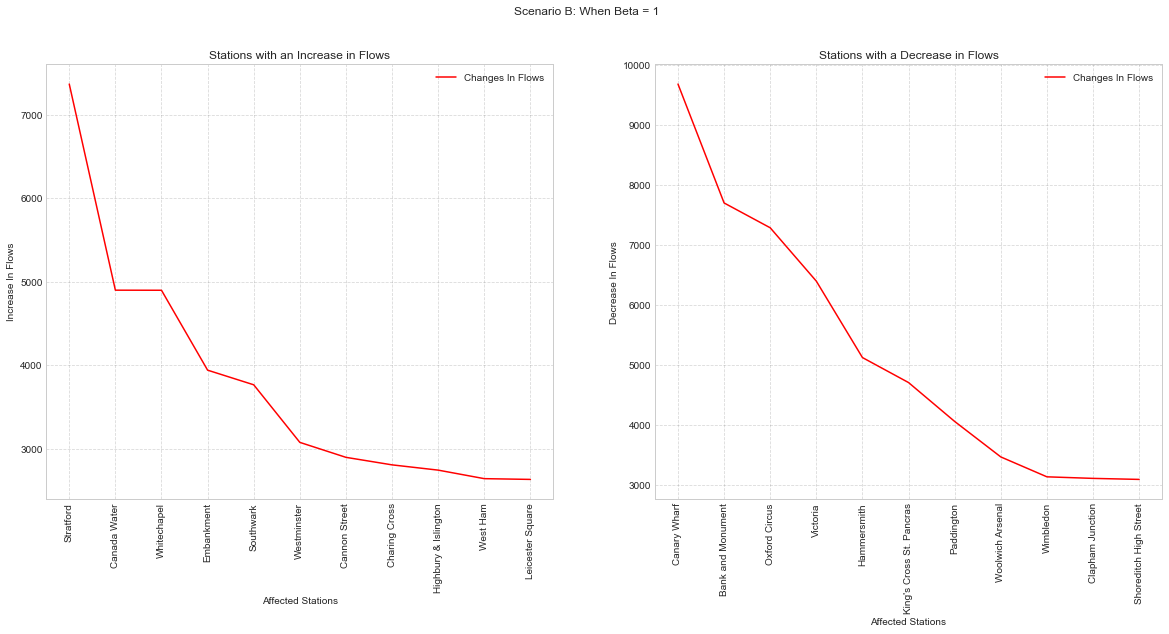

In [126]:
#plot for scenario B(1)
fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].set_title('Stations with an Increase in Flows')
fig.suptitle("Scenario B: When Beta = 1") 
ax[0].plot(list(diff2['diff_abs1'][:11]), color = "red", label = 'Changes In Flows') 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Affected Stations") 
ax[0].set_ylabel("Increase In Flows")  
ax[0].set_xticks(list(range(11))) 
ax[0].set_xticklabels(list(diff2['station_destination'])[:11], rotation=90)
ax[0].legend(loc=1)




ax[1].set_title('Stations with a Decrease in Flows')
fig.suptitle("Scenario B: When Beta = 1") 
ax[1].plot(list(diff_d1['diff_abs_d1'][:11]), color = "red", label = 'Changes In Flows') 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Affected Stations") 
ax[1].set_ylabel("Decrease In Flows")  
ax[1].set_xticks(list(range(11))) 
ax[1].set_xticklabels(list(diff_d1['station_destination'])[:11], rotation=90)
ax[1].legend(loc=1)
plt.show()

### $\beta$2 = 2

In [127]:
#set the new beta2 = the celiabrated beta*3 
beta2 = 2

In [128]:
#check the new beta
beta2

2

In [129]:
flows["prodsimest_b2"] = np.exp(flows["alpha"]+gamma*np.log(flows["jobs"]) - beta2*flows["distance"])
flows["prodsimest_b2"] = round(flows["prodsimest_b2"],0)

In [130]:
flows3 = flows.pivot_table(values ="prodsimest_b2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
Aldgate East,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [131]:
#calculate some new alpha and beta values
Dj_gamma2 = flows["jobs"]**gamma
dist_beta2 = flows["distance"]**-beta2
#calcualte the first stage of the Ai values
flows["Ai1_2"] = Dj_gamma2 * dist_beta2
#now do the sum over all js bit
A_i2 = pd.DataFrame(flows.groupby(["station_origin"])["Ai1_2"].agg(np.sum))
#now divide into 1
A_i2["Ai1_2"] = 1/A_i2["Ai1_2"]
A_i2.rename(columns={"Ai1_2":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
flows = flows.merge(A_i2, left_on="station_origin", right_index=True, how="left")

In [132]:
#to check everything works, recreate the original estimates
flows["prodsimest_beta2"] = flows["A_i2"]*flows["O_i"]*Dj_gamma2*dist_beta2
#round
flows["prodsimest_beta2"] = round(flows["prodsimest_beta2"])
#check
flows[["prodsimest1", "prodsimest_beta2"]]

,prodsimest1,prodsimest_beta2
0,78.0,7.0
1,1.0,0.0
2,4.0,1.0
3,99.0,15.0
4,56.0,28.0
...,...,...
61451,99.0,75.0
61452,295.0,258.0
61453,36.0,30.0
61454,125.0,173.0


In [133]:
flows3_1 = flows.pivot_table(values ="prodsimest_beta2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows3_1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,7.0,7.0,NaN,15.0,0.0,NaN,9.0,...,7.0,2.0,2.0,16.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,0.0,NaN,61.0,NaN,NaN,0.0,NaN,10.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2875.0
Aldgate East,NaN,NaN,0.0,87.0,NaN,NaN,0.0,0.0,NaN,13.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,3154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,3.0,30.0,37.0,NaN,NaN,NaN,NaN,24.0,...,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,3.0,15.0,15.0,NaN,1.0,NaN,NaN,22.0,...,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


#### Visualize the flow change in Scenario B

In [134]:
#count the change
diff_3 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimest_beta2':'sum'})
diff_3["differences_3"]= diff_3["prodsimest_beta2"] - diff_3["flows"]
#diff_3["ori_per2"]= diff_3["flows"] / 1542283.0
#diff_3["A_per2"]= diff_3["prodsimest_b2"] / 288596.0
#diff_3["Ori_A_per2"]= diff_3["A_per2"]-diff_3["ori_per2"]

#diff_3["per_abs2"]= abs(diff_3["Ori_A_per2"])
diff_3["diff_abs2"]= abs(diff_3["differences_3"])
diff_3.sort_values(by=["diff_abs2"],ascending= False, inplace = True)
diff_3.head(11)

,station_destination,flows,prodsimest_beta2,differences_3,diff_abs2
55,Canary Wharf,58772,40985.0,-17787.0,17787.0
252,Oxford Circus,44368,30320.0,-14048.0,14048.0
213,Liverpool Street,61122,47469.0,-13653.0,13653.0
15,Bank and Monument,78549,65885.0,-12664.0,12664.0
356,Victoria,33251,21639.0,-11612.0,11612.0
328,Stratford High Street,788,10118.0,9330.0,9330.0
120,Farringdon,25592,16362.0,-9230.0,9230.0
314,Southwark,10326,18012.0,7686.0,7686.0
198,King's Cross St. Pancras,33330,25881.0,-7449.0,7449.0
228,Moorgate,24574,31947.0,7373.0,7373.0


In [135]:
#count the change
diff3 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimest_beta2':'sum'})
diff3["differences3"]= diff3["prodsimest_beta2"] - diff3["flows"]

diff3["diff_abs2"]= abs(diff3["differences3"])
diff3.sort_values(by=["differences3"],ascending= False, inplace = True)
diff3 = diff3.head(11)
diff3

,station_destination,flows,prodsimest_beta2,differences3,diff_abs2
328,Stratford High Street,788,10118.0,9330.0,9330.0
314,Southwark,10326,18012.0,7686.0,7686.0
228,Moorgate,24574,31947.0,7373.0,7373.0
113,Embankment,10220,17055.0,6835.0,6835.0
375,West Ham,5487,11385.0,5898.0,5898.0
57,Cannon Street,4698,10379.0,5681.0,5681.0
384,Westminster,15466,20610.0,5144.0,5144.0
164,Heron Quays,5975,10535.0,4560.0,4560.0
316,St. James's Park,13339,17533.0,4194.0,4194.0
108,Edgware Road,6868,10967.0,4099.0,4099.0


In [136]:
#count the change
diff_d2 = flows.groupby('station_destination',as_index=False).agg({'flows':'sum','prodsimest_beta2':'sum'})
diff_d2["differences_d2"]= diff_d2["prodsimest_beta2"] - diff_d2["flows"]

diff_d2["diff_abs_d2"]= abs(diff_d2["differences_d2"])
diff_d2.sort_values(by=["differences_d2"],ascending= True, inplace = True)
diff_d2 = diff_d2.head(11)
diff_d2

,station_destination,flows,prodsimest_beta2,differences_d2,diff_abs_d2
55,Canary Wharf,58772,40985.0,-17787.0,17787.0
252,Oxford Circus,44368,30320.0,-14048.0,14048.0
213,Liverpool Street,61122,47469.0,-13653.0,13653.0
15,Bank and Monument,78549,65885.0,-12664.0,12664.0
356,Victoria,33251,21639.0,-11612.0,11612.0
120,Farringdon,25592,16362.0,-9230.0,9230.0
198,King's Cross St. Pancras,33330,25881.0,-7449.0,7449.0
253,Paddington,20193,13391.0,-6802.0,6802.0
327,Stratford,55954,49764.0,-6190.0,6190.0
148,Hammersmith,18250,12116.0,-6134.0,6134.0


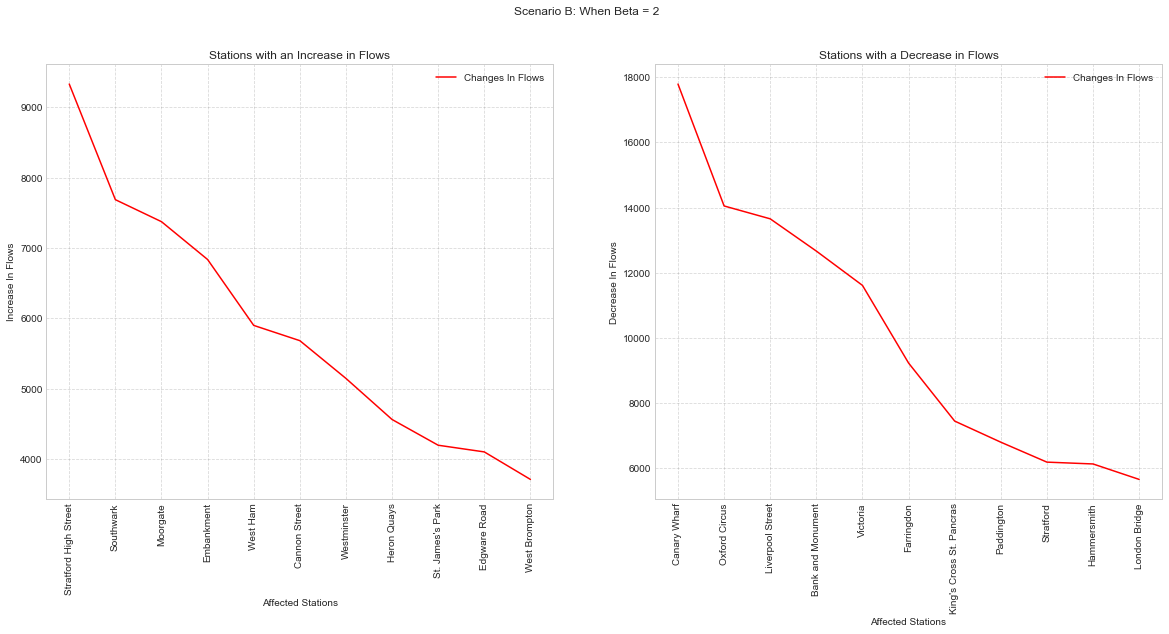

In [137]:
#plot for scenario B(1)
fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].set_title('Stations with an Increase in Flows')
fig.suptitle("Scenario B: When Beta = 2") 
ax[0].plot(list(diff3['diff_abs2'][:11]), color = "red", label = 'Changes In Flows') 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Affected Stations") 
ax[0].set_ylabel("Increase In Flows")  
ax[0].set_xticks(list(range(11))) 
ax[0].set_xticklabels(list(diff3['station_destination'])[:11], rotation=90)
ax[0].legend(loc=1)




ax[1].set_title('Stations with a Decrease in Flows')
fig.suptitle("Scenario B: When Beta = 2") 
ax[1].plot(list(diff_d2['diff_abs_d2'][:11]), color = "red", label = 'Changes In Flows') 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Affected Stations") 
ax[1].set_ylabel("Decrease In Flows")  
ax[1].set_xticks(list(range(11))) 
ax[1].set_xticklabels(list(diff_d2['station_destination'])[:11], rotation=90)
ax[1].legend(loc=1)
plt.show()

### Compare Scenario A and B (two beta)

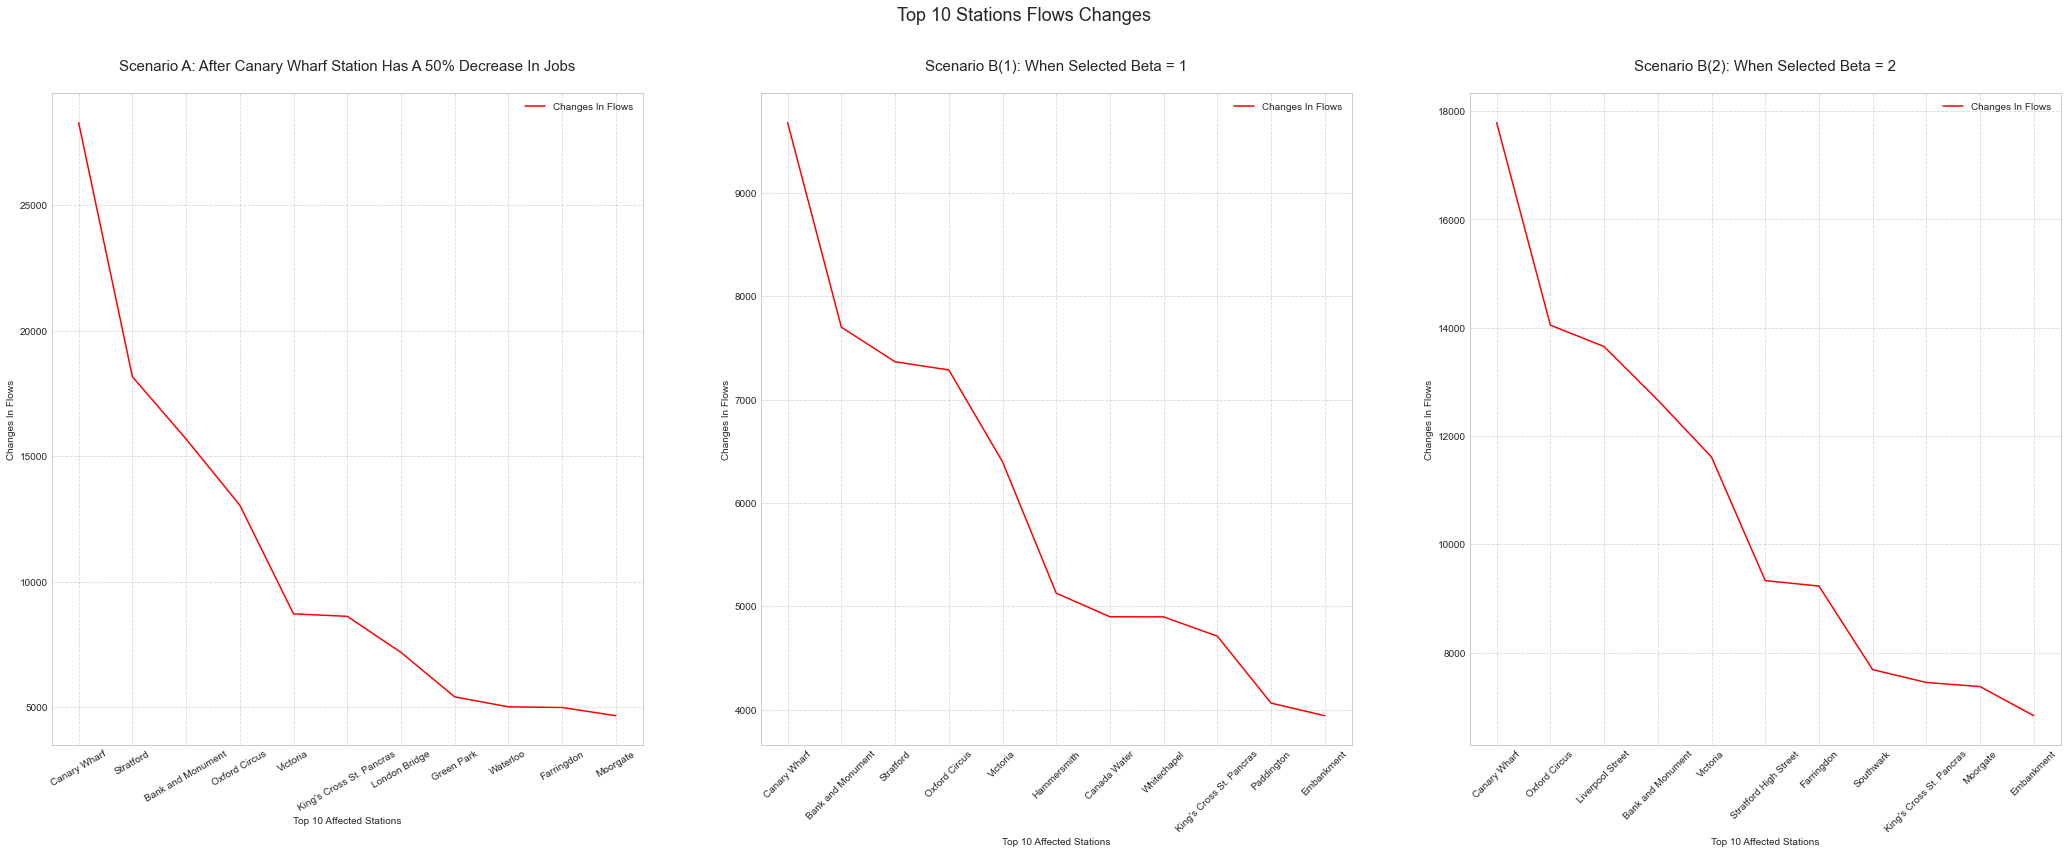

In [138]:
#Plot for Scenario A & Scenario B
fig, ax = plt.subplots(1,3,figsize=(36,12))

ax[0].set_title('Scenario A: After Canary Wharf Station Has A 50% Decrease In Jobs\n', size = 15)
fig.suptitle("Top 10 Stations Flows Changes", size = 18) 
ax[0].plot(list(diff_1['diff_abs'][:11]), color = "red", label = "Changes In Flows") 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Top 10 Affected Stations") 
ax[0].set_ylabel("Changes In Flows")  
ax[0].set_xticks(list(range(11))) 
ax[0].set_xticklabels(list(diff_1['station_destination'])[:11], rotation=30)
ax[0].legend(loc=1)

ax[1].set_title('Scenario B(1): When Selected Beta = 1\n', size = 15)
#fig.suptitle("Top 10 Stations Flows Change In\n(% Each Station's Flows / Total Flows)", size = 18) 
ax[1].plot(list(diff_2['diff_abs1'][:11]), color = "red", label = "Changes In Flows") 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Top 10 Affected Stations") 
ax[1].set_ylabel("Changes In Flows")  
ax[1].set_xticks(list(range(11))) 
ax[1].set_xticklabels(list(diff_2['station_destination'])[:11], rotation=45)
ax[1].legend(loc=1)


ax[2].set_title('Scenario B(2): When Selected Beta = 2\n', size = 15)
#fig.suptitle("Top 10 Stations Flows Change In\n(% Each Station's Flows / Total Flows)", size = 18) 
ax[2].plot(list(diff_3['diff_abs2'][:11]), color = "red", label = "Changes In Flows") 
ax[2].grid(color='grey', linestyle='--',alpha=0.3) 
ax[2].set_xlabel("Top 10 Affected Stations") 
ax[2].set_ylabel("Changes In Flows")  
ax[2].set_xticks(list(range(11))) 
ax[2].set_xticklabels(list(diff_3['station_destination'])[:11], rotation=45)
ax[2].legend(loc=1)
plt.show()

In [139]:
A_B = diff_1[['station_destination','flows','prodsimestsa1']]
A_B = pd.merge(A_B,diff_2[['prodsimest_beta1','station_destination']],on='station_destination')
A_B = pd.merge(A_B,diff_3[['prodsimest_beta2','station_destination']],on='station_destination')

In [140]:
#check
A_B

,station_destination,flows,prodsimestsa1,prodsimest_beta1,prodsimest_beta2
0,Canary Wharf,58772,30481.0,49095.0,40985.0
1,Stratford,55954,74119.0,63319.0,49764.0
2,Bank and Monument,78549,62870.0,70850.0,65885.0
3,Oxford Circus,44368,31325.0,37082.0,30320.0
4,Victoria,33251,24541.0,26853.0,21639.0
...,...,...,...,...,...
394,Maryland,350,335.0,664.0,1901.0
395,Canonbury,846,833.0,1078.0,1838.0
396,Kentish Town West,1128,1135.0,1030.0,962.0
397,Beckton Park,88,91.0,85.0,117.0


In [141]:
#calculate the percentage changes under A and B scenarios
A_B['ChangeA']=((A_B['prodsimestsa1']-A_B['flows'])/A_B['flows'])*100
A_B['ChangeB1']=((A_B['prodsimest_beta1']-A_B['flows'])/A_B['flows'])*100
A_B['ChangeB2']=((A_B['prodsimest_beta2']-A_B['flows'])/A_B['flows'])*100

In [142]:
#check
A_B

,station_destination,flows,prodsimestsa1,prodsimest_beta1,prodsimest_beta2,ChangeA,ChangeB1,ChangeB2
0,Canary Wharf,58772,30481.0,49095.0,40985.0,-48.136868,-16.465324,-30.264412
1,Stratford,55954,74119.0,63319.0,49764.0,32.464167,13.162598,-11.062659
2,Bank and Monument,78549,62870.0,70850.0,65885.0,-19.960789,-9.801525,-16.122420
3,Oxford Circus,44368,31325.0,37082.0,30320.0,-29.397313,-16.421745,-31.662459
4,Victoria,33251,24541.0,26853.0,21639.0,-26.194701,-19.241527,-34.922258
...,...,...,...,...,...,...,...,...
394,Maryland,350,335.0,664.0,1901.0,-4.285714,89.714286,443.142857
395,Canonbury,846,833.0,1078.0,1838.0,-1.536643,27.423168,117.257683
396,Kentish Town West,1128,1135.0,1030.0,962.0,0.620567,-8.687943,-14.716312
397,Beckton Park,88,91.0,85.0,117.0,3.409091,-3.409091,32.954545


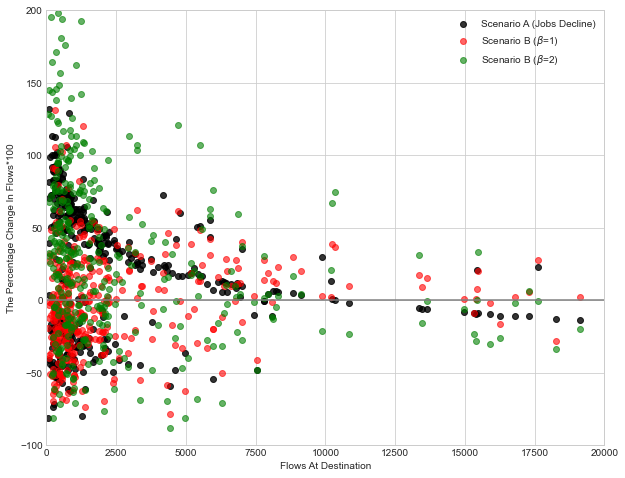

In [143]:
fig, ax = plt.subplots(figsize=(10,8))

alpha=0.5
plt.xlim(0,20000)
plt.ylim(-100,200)

plt.scatter(A_B['flows'],A_B['ChangeA'],alpha=0.8,label='Scenario A (Jobs Decline)', c='k')
plt.scatter(A_B['flows'],A_B['ChangeB1'],alpha=0.6,label=r'Scenario B ($\beta$=1)', c='r')
plt.scatter(A_B['flows'],A_B['ChangeB2'],alpha=0.6,label=r'Scenario B ($\beta$=2)', c='g')

plt.axhline(color="grey", linestyle="-")
ax.legend()
plt.legend(loc='upper right')
ax.grid(True)
ax.set_xlabel('Flows At Destination', fontsize=10)
ax.set_ylabel('The Percentage Change In Flows*100', fontsize=10)

plt.show()